# Lending club case study

In [290]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Data retrieve
Printing the head (5 rows) of the loan csv

In [291]:
# Reading the CSV file from the storage
loan_df = pd.read_csv("loan.csv")

# Printing the head of the CSV
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.

#### Shape and number of unique values in each column

In [292]:
# Printing the shape of the dataFrame
print(loan_df.shape)

# Find out how many unique values are available in each column to understand the categorisation possibility
loan_df.nunique()

(39717, 111)


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

#### Find out the null value % in each column
Maintain a list of coumns with null % more than 40

In [293]:
# print(100 * loan_df.isnull().mean())
columnsWithMoreThanFortyPercentNullValues = []
for col in loan_df.columns:
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 40:
        columnsWithMoreThanFortyPercentNullValues.append(col)
        print(col, "\t:\t", percentage)

print(len(columnsWithMoreThanFortyPercentNullValues))

mths_since_last_delinq 	:	 64.66248709620565
mths_since_last_record 	:	 92.98537150338646
next_pymnt_d 	:	 97.12969257496789
mths_since_last_major_derog 	:	 100.0
annual_inc_joint 	:	 100.0
dti_joint 	:	 100.0
verification_status_joint 	:	 100.0
tot_coll_amt 	:	 100.0
tot_cur_bal 	:	 100.0
open_acc_6m 	:	 100.0
open_il_6m 	:	 100.0
open_il_12m 	:	 100.0
open_il_24m 	:	 100.0
mths_since_rcnt_il 	:	 100.0
total_bal_il 	:	 100.0
il_util 	:	 100.0
open_rv_12m 	:	 100.0
open_rv_24m 	:	 100.0
max_bal_bc 	:	 100.0
all_util 	:	 100.0
total_rev_hi_lim 	:	 100.0
inq_fi 	:	 100.0
total_cu_tl 	:	 100.0
inq_last_12m 	:	 100.0
acc_open_past_24mths 	:	 100.0
avg_cur_bal 	:	 100.0
bc_open_to_buy 	:	 100.0
bc_util 	:	 100.0
mo_sin_old_il_acct 	:	 100.0
mo_sin_old_rev_tl_op 	:	 100.0
mo_sin_rcnt_rev_tl_op 	:	 100.0
mo_sin_rcnt_tl 	:	 100.0
mort_acc 	:	 100.0
mths_since_recent_bc 	:	 100.0
mths_since_recent_bc_dlq 	:	 100.0
mths_since_recent_inq 	:	 100.0
mths_since_recent_revol_delinq 	:	 100.0
num_acct

#### Drop columns with null percentage of more than 40%

In [294]:
loan_df = loan_df.dropna(thresh=0.4 * loan_df.shape[0], axis=1)
print(loan_df.shape)

(39717, 54)


Recheck the null column with percentage. This time printing all columns with percentage more 0

In [295]:
for col in loan_df.columns:
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 0:
        print(col, "\t:\t", percentage)

emp_title 	:	 6.191303472064859
emp_length 	:	 2.7066495455346575
desc 	:	 32.58050708764509
title 	:	 0.027695948838029054
revol_util 	:	 0.12589067653649572
last_pymnt_d 	:	 0.1787647606818239
last_credit_pull_d 	:	 0.0050356270614598285
collections_12_mths_ex_med 	:	 0.1409975577208752
chargeoff_within_12_mths 	:	 0.1409975577208752
pub_rec_bankruptcies 	:	 1.7549160309187504
tax_liens 	:	 0.09819472769846666


#### Find columns with just one unique value

In [296]:
# Find out how many unique values are available in each column to understand the categorisation possibility
columnsWithOneUniqueValue = []
for col in loan_df.columns:
    unique_count = loan_df[col].nunique()
    if unique_count == 1:
        columnsWithOneUniqueValue.append(col)
print(columnsWithOneUniqueValue)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


#### Some columns are having only one value so they won't be of any use to us as the value is not varying at all
Drop such columns from the table

In [297]:
loan_df = loan_df.drop(columnsWithOneUniqueValue, axis=1)
print(loan_df.shape)
loan_df.head()

(39717, 45)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00


#### Understand the values in the columns

In [298]:
# Describe the values
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


In [150]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Segregating columns in categories
Dropping columns that will not help in analysis
- "id", "member_id", "url", "desc", "title", "zip_code", "emp_title", 
              "issue_d", "total_rec_late_fee", "last_pymnt_amnt", "last_credit_pull_d",
             "collection_recovery_fee", "last_pymnt_d"

In [299]:
extra_cols = ["id", "member_id", "url", "desc", "title", "zip_code", "emp_title", 
              "issue_d", "total_rec_late_fee", "last_pymnt_amnt", "last_credit_pull_d",
             "collection_recovery_fee", "last_pymnt_d"]
loan_df = loan_df.drop(extra_cols,axis=1)
print(loan_df.shape)

(39717, 32)


#### Segregating columns in categories

In [300]:
cat_cols = ["term", "int_rate", "grade", "sub_grade", "emp_length", 
            "home_ownership", "verification_status", "loan_status",
           "purpose", "addr_state", "delinq_2yrs", "inq_last_6mths", "open_acc",
           "pub_rec", "pub_rec_bankruptcies"]
# emp_title
other_columns = set(loan_df.columns.values) - set(cat_cols)
repeat_columns = ["funded_amnt_inv", "out_prncp_inv", "total_pymnt_inv"]

#### Dropping the repeat columns

In [301]:
loan_df = loan_df.drop(repeat_columns, axis=1)
loan_df.shape

(39717, 29)

#### Checking the number of null columns in each row

In [302]:
loan_df.isnull().sum(axis=1).sort_values()

0        0
25945    0
25946    0
25947    0
25948    0
        ..
6146     1
29984    1
11282    2
24984    2
4714     2
Length: 39717, dtype: int64

#### Print the columns with null % more than 0
- Printing the mode value for each column

In [303]:
columnsWtihNullValues_second = []
for col in loan_df.columns:
    total_null_values = loan_df[col].isnull().sum()
    percentage = 100 * loan_df[col].isnull().mean()
    if percentage > 0:
        columnsWtihNullValues_second.append(col)
        print(col, "\t:\t", percentage, total_null_values)
        print(loan_df[col].value_counts().head(1))
        print((loan_df[col].value_counts().head(1) / len(loan_df[col])) * 100)
        print("---------------")

print(len(columnsWtihNullValues_second))

emp_length 	:	 2.7066495455346575 1075
10+ years    8879
Name: emp_length, dtype: int64
10+ years   22.36
Name: emp_length, dtype: float64
---------------
revol_util 	:	 0.12589067653649572 50
0%    977
Name: revol_util, dtype: int64
0%   2.46
Name: revol_util, dtype: float64
---------------
pub_rec_bankruptcies 	:	 1.7549160309187504 697
0.00    37339
Name: pub_rec_bankruptcies, dtype: int64
0.00   94.01
Name: pub_rec_bankruptcies, dtype: float64
---------------
3


#### Handling null values
- Only 3% null values in emp_title and 22% of the total records are 10+ years so filling the null values with mode
- only 0.1% null values in revol_util but mode is only 2.4% hence not replacing the value and dropping it instead
- Only 2% pub_rec_bankruptcies are null and 94% are 0 value hence replacing with mode

In [304]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)

In [305]:
print(loan_df.emp_length.isna().sum(), 
      loan_df.revol_util.isna().sum(), 
      loan_df.pub_rec_bankruptcies.isna().sum())

print(loan_df.columns, len(loan_df.columns))
loan_df.describe()

0 0 0
Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries',
       'pub_rec_bankruptcies'],
      dtype='object') 29


,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
count,"39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00","39,667.00"
mean,"11,227.66","10,955.59",324.77,"68,999.52",13.32,0.15,0.87,9.30,0.06,"13,398.16",22.10,51.29,"12,163.32","9,801.39","2,265.38",95.19,0.04
std,"7,456.61","7,187.14",208.88,"63,789.47",6.68,0.49,1.07,4.40,0.24,"15,887.04",11.40,375.40,"9,042.58","7,065.46","2,609.13",689.07,0.20
min,500.00,500.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"5,500.00","5,400.00",167.08,"40,516.32",8.18,0.00,0.00,6.00,0.00,"3,717.00",14.00,0.00,"5,581.77","4,600.00",662.82,0.00,0.00
50%,"10,000.00","9,625.00",280.61,"59,000.00",13.41,0.00,1.00,9.00,0.00,"8,863.00",20.00,0.00,"9,918.34","8,000.00","1,350.83",0.00,0.00
75%,"15,000.00","15,000.00",430.78,"82,400.00",18.60,0.00,1.00,12.00,0.00,"17,070.00",29.00,0.00,"16,543.44","13,697.15","2,836.11",0.00,0.00
max,"35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","58,563.68","35,000.02","23,563.68","29,623.35",2.00


### Standardizing the values in the columns
- Remove the % from the int_rate
- Remove the % from the revol_util
- Remove years from emp_length and treat <1 as 0 and 10+ as 10
- Convert all above columns to numeric types

In [308]:
loan_df.revol_util = pd.to_numeric(loan_df["revol_util"].str.rstrip("%"))
loan_df.int_rate = pd.to_numeric(loan_df["int_rate"].str.rstrip("%"))
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

### Loan status of users

<Axes: xlabel='loan_status', ylabel='count'>

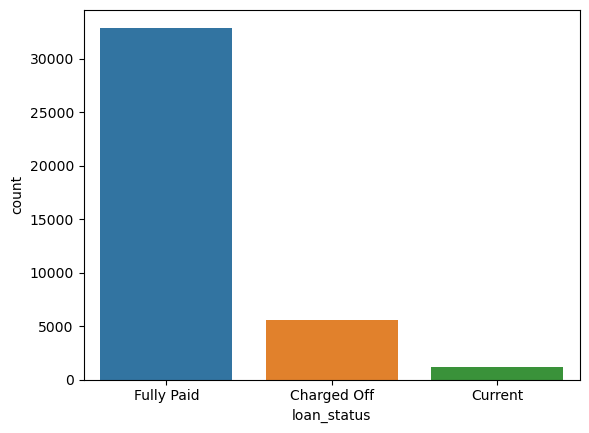

In [309]:
sns.countplot(x="loan_status", data=loan_df)

_________
### Treating the important columns individually

#### Starting with annual_inc

count      39,667.00
mean       68,999.52
std        63,789.47
min         4,000.00
25%        40,516.32
50%        59,000.00
75%        82,400.00
max     6,000,000.00
Name: annual_inc, dtype: float64


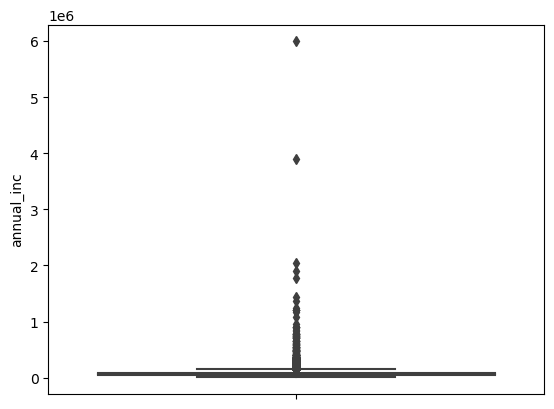

In [310]:
# Starting with annual_inc

print(loan_df["annual_inc"].describe())
sns.boxplot(y=loan_df["annual_inc"])
plt.show()

#### Function to remove outliers

In [311]:
# Function to remove outliers
def findTheOutlierHighAndLow(dataFrame, columnName):
    columnValue = dataFrame[columnName]
    columnQ1 = columnValue.quantile(0.25)
    columnQ3 = columnValue.quantile(0.75)
    columnIQR = columnQ3 - columnQ1
    columnHighIQR = columnQ3 + (1.5 * columnIQR)
    columnLowIQR = columnQ1 - (1.5 * columnIQR)
    return (columnLowIQR, columnHighIQR)

#### Function to draw boxplot side by side

In [312]:
def drawBoxPlot(dataFrame, column, fullTitle, leftTitle, rightTitle):
    charged_off_users = loan_without_current_df[dataFrame["loan_status"] == "Charged Off"]
    fully_paid_users = loan_without_current_df[dataFrame["loan_status"] == "Fully Paid"]

    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(fullTitle)

    axes[0].set_title(leftTitle)
    sns.boxplot(ax=axes[0], y=column, data=fully_paid_users)


    axes[1].set_title(rightTitle)
    sns.boxplot(ax=axes[1], y=column, data=charged_off_users)

In [ ]:
# Create hue with %
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [313]:
annual_inc_low_iqr, annual_inc_high_iqr = findTheOutlierHighAndLow(loan_df, "annual_inc")
print("Annual income High IQR", annual_inc_high_iqr)
print("Annual income Low IQR",  annual_inc_low_iqr)
annual_inc_quantile_info = loan_df.annual_inc.quantile([0.50,0.75, 0.80, 0.85, 0.90, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
annual_inc_quantile_info

Annual income High IQR 145225.52000000002
Annual income Low IQR -22309.200000000004


0.50      59,000.00
0.75      82,400.00
0.80      90,000.00
0.85     100,000.00
0.90     116,000.00
0.94     135,000.00
0.95     142,000.00
0.96     150,000.00
0.97     165,996.00
0.98     187,000.00
0.99     234,997.36
1.00   6,000,000.00
Name: annual_inc, dtype: float64

#### Removing the outliers from the annual_inc

In [314]:
loan_df = loan_df[loan_df["annual_inc"] < annual_inc_high_iqr]
loan_df.shape

(37825, 29)

In [315]:
loan_without_current_df = loan_df[loan_df["loan_status"] != "Current"]
loan_without_current_df.shape

(36768, 29)

#### Comparing the annual_inc of charged_Off users vs paid users

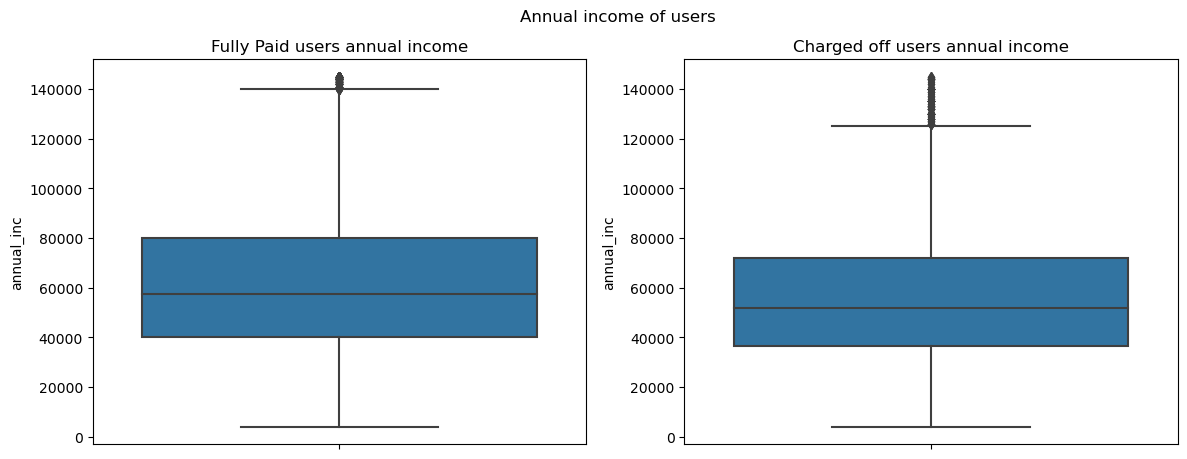

In [316]:
drawBoxPlot(loan_without_current_df, "annual_inc", 
            "Annual income of users", 
            "Fully Paid users annual income", 
            "Charged off users annual income")

# sns.histplot(x="annual_inc", data=loan_without_current_df)

#### loan amount analysis

In [317]:
loan_amount_low_outlier, loan_amount_high_outlier = findTheOutlierHighAndLow(loan_without_current_df, "loan_amnt")
print("Low - ", loan_amount_low_outlier, "| High - ", loan_amount_high_outlier)
loan_amount_quantile_info = loan_df.loan_amnt.quantile([0.50,0.75, 0.80, 0.85, 0.90, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(loan_amount_quantile_info)

loan_amount_df = loan_without_current_df["loan_amnt"]
loan_amount_df.describe()

Low -  -10000.0 | High -  30000.0
0.50    9,600.00
0.75   15,000.00
0.80   16,000.00
0.85   18,800.00
0.90   20,675.00
0.94   25,000.00
0.95   25,000.00
0.96   25,000.00
0.97   27,250.00
0.98   30,000.00
0.99   35,000.00
1.00   35,000.00
Name: loan_amnt, dtype: float64


count   36,768.00
mean    10,714.75
std      7,068.02
min        500.00
25%      5,000.00
50%      9,250.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

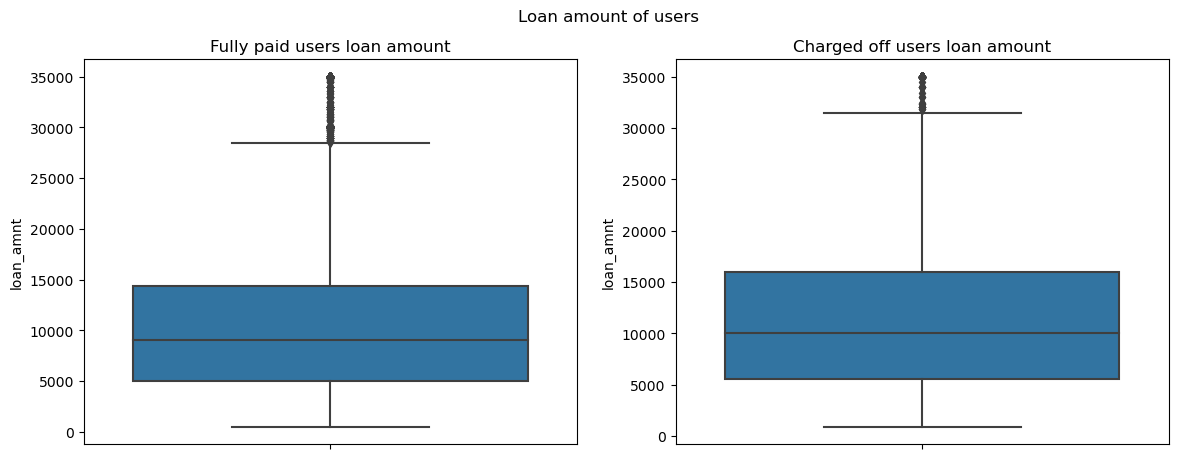

In [318]:
drawBoxPlot(loan_without_current_df, "loan_amnt", 
            "Loan amount of users", 
            "Fully paid users loan amount", 
            "Charged off users loan amount")

#### Creating the bins for the columns with very high variance

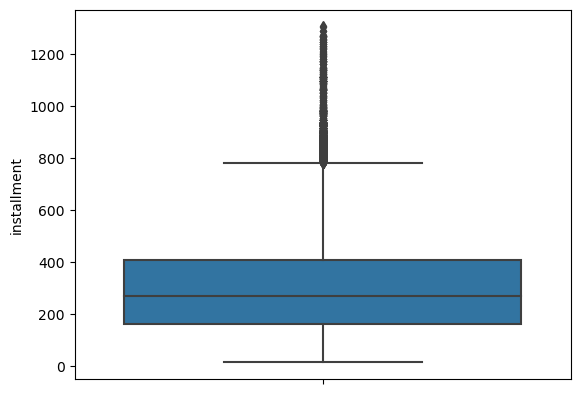

-206.23624999999996 779.77375


0.50     271.44
0.75     410.02
0.80     464.72
0.85     511.14
0.90     590.48
0.95     709.82
0.96     768.19
0.97     811.03
0.98     849.05
0.99     901.01
1.00   1,305.19
Name: installment, dtype: float64

In [342]:
loan_without_current_df["annual_inc_bins"] = pd.cut(loan_without_current_df["annual_inc"], 
                                                    bins=5, 
                                                    precision =0,
                                                    labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_without_current_df["int_rate_bins"] = pd.cut(loan_without_current_df["int_rate"], bins=5,
                                                  precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_without_current_df["open_acc_bins"] = pd.cut(loan_without_current_df["open_acc"], bins=5,
                                                  precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_without_current_df["revol_util_bins"] = pd.cut(loan_without_current_df["revol_util"], bins=5,
                                                  precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_without_current_df["total_acc_bins"] = pd.cut(loan_without_current_df["total_acc"], bins=5,
                                                  precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

loan_without_current_df["loan_amnt_bins"] = pd.cut(loan_without_current_df["loan_amnt"], 
                                                    bins=5, 
                                                    precision =0,
                                                    labels=['0k-8k','8k-16k','16k-24k','24k-32k','32k-40k'])
# sns.boxplot(y="installment", data=loan_without_current_df)
# plt.show()
# loanInterestQuantile = loan_without_current_df.installment.quantile([0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
# installment_low_outlier, installment_high_outlier = findTheOutlierHighAndLow(loan_without_current_df, "installment")
# print(installment_low_outlier, installment_high_outlier)
# loanInterestQuantile

#### Understanding the behaviour of Charged Off users vs Fully Paid users

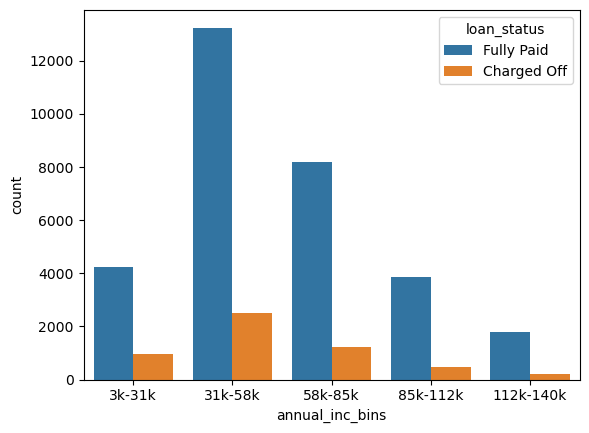

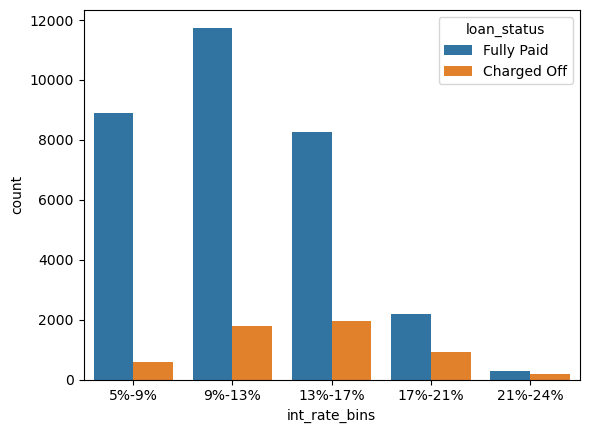

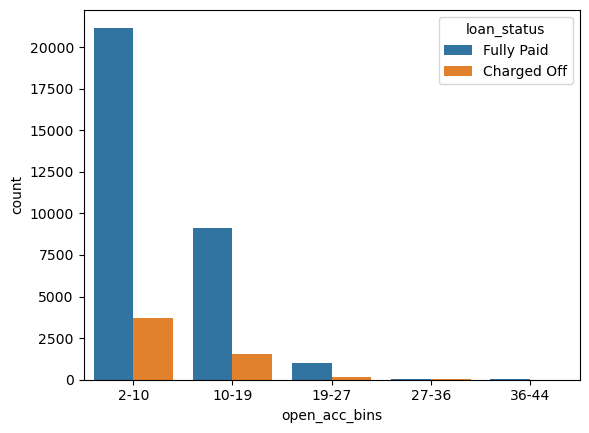

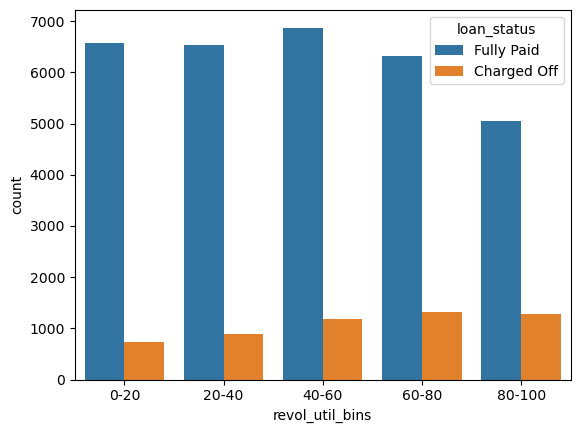

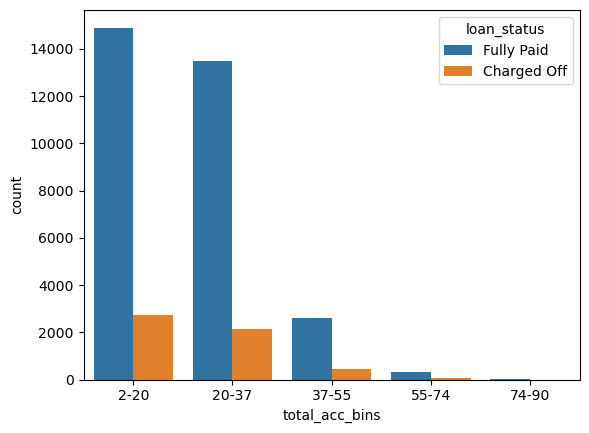

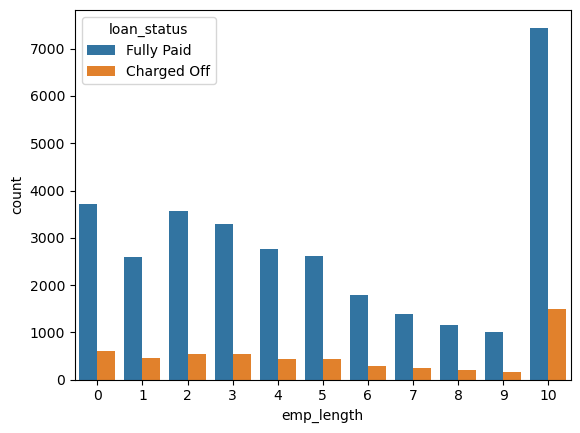

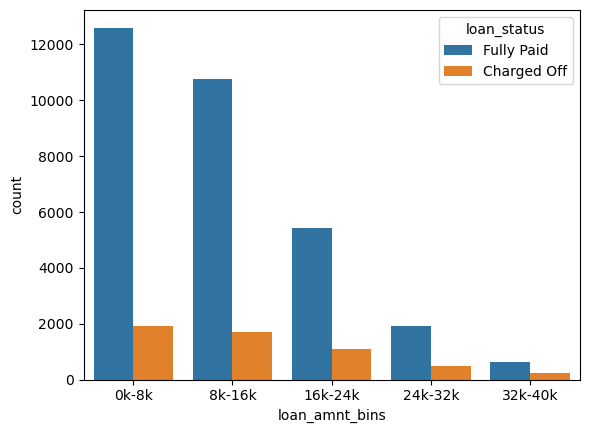

In [338]:
sns.countplot(x="annual_inc_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="int_rate_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="open_acc_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="revol_util_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="total_acc_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="emp_length", data=loan_without_current_df, hue="loan_status")
plt.show()

sns.countplot(x="loan_amnt_bins", data=loan_without_current_df, hue="loan_status")
plt.show()

#### Analyzing the data of charged off users